# Ajuste de Intensidad
Notas Importantes:

- OpenCV and Matplotlib expect different orders of the RGB channels
- Matplotlib Orders: RED GREEN BLUE
- OpenCV Orders: BLUE GREEN RED

## Librerías

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image
from google.colab import files
import requests

## Leer Archivos

In [4]:
# Abrimos la imagen con openCV: Se trata de una matriz de numpy
# img = cv2.imread('../images/bananos.jpg')

# Opción Colab: Cargar la imagen desde un archivo local en Google Colab
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
type(img)

Saving platanos.jpg to platanos.jpg


numpy.ndarray

In [5]:
# Resolución 900x1200 píxeles y 3 valores por píxel (RGB)
img.shape

(900, 1200, 3)

In [6]:
img[500,500]

array([  0, 187, 245], dtype=uint8)

## Plotear la imagen
Recuerda que Matplotlib y OpenCV trabajan por defecto en diferentes ordenes RGB

- Matplotlib Orders: RED GREEN BLUE
- OpenCV Orders: BLUE GREEN RED

### BGR

[ 21 211 252]


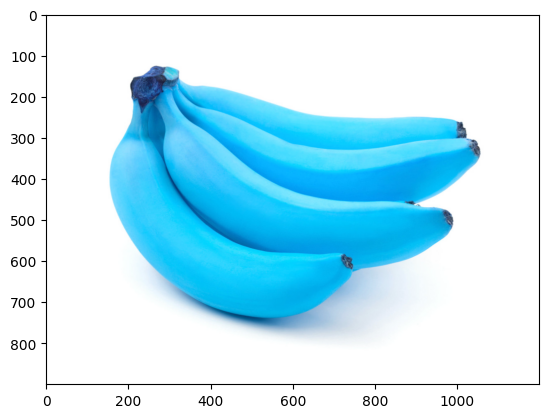

In [7]:
# ¿color raro? OpenCv la ha abierto en BGR
plt.imshow(img);
print(img[600,500]) # Imprimimos un Píxel BGR

### RGB

[252 211  21]


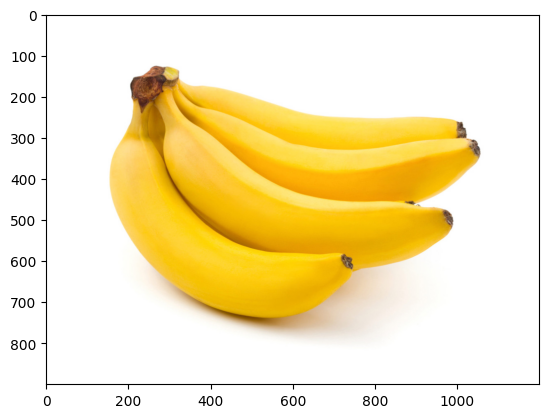

In [8]:
# Convert the color channels from BGR (OpenCV default) to RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img);
print(rgb_img[600,500]) # Imprimimos un Píxel BGR

### Escala de Grises
- Es más sencillo trabajar con 1 valor por píxel que 3 valores por píxel
- Obtener medidas sobre la intensidad en la imagen

202


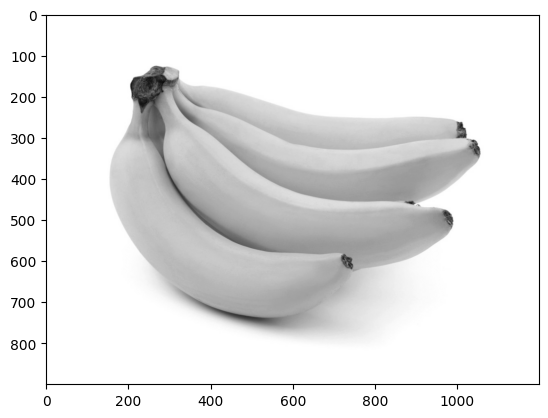

In [9]:
# Pasamos a Escala de Grises (Un solo valor por píxel donde 0 es negro y 255 blanco)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img[600,500]) # Imprimimos un Píxel Gray Scale
plt.imshow(gray_img, cmap='gray');

# Alternativa: Leer la imagen en escala de grises
# gray_img = cv2.imread('../images/bananos.jpg', cv2.IMREAD_GRAYSCALE)

## Umbralización: Imagen Binaria
- Se usa para resaltar objetos de interés
- Obtener medidss sobre la forma de los objetos

0


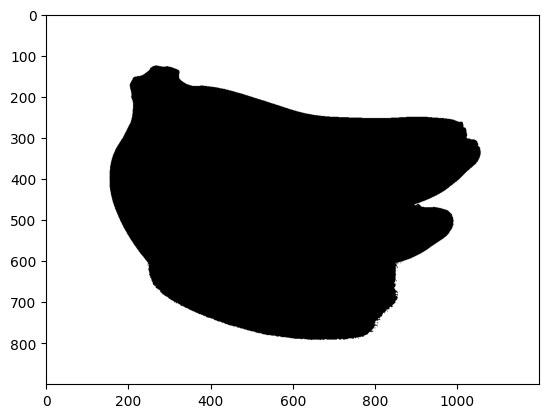

In [16]:
umbral = 240
binaria = np.uint8((gray_img>umbral)*255) # uint8 es un entero de 8 bits por lo tanto es un entero entre 0 y 255
print(binaria[600,500]) # Imprimimos un Píxel binario
plt.imshow(binaria, cmap='gray');

In [12]:
gray_img>umbral

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

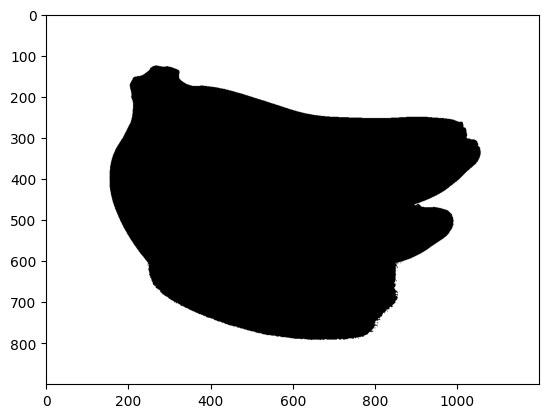

In [13]:
# Aplicar un umbral para binarizar la imagen
# threshold: valor umbral, max_value: valor asignado para píxeles mayores al umbral
threshold = 240
_, binary_image = cv2.threshold(gray_img, threshold, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray');

### ¿Puedo fijar un valor óptimo visual para la umbralización?

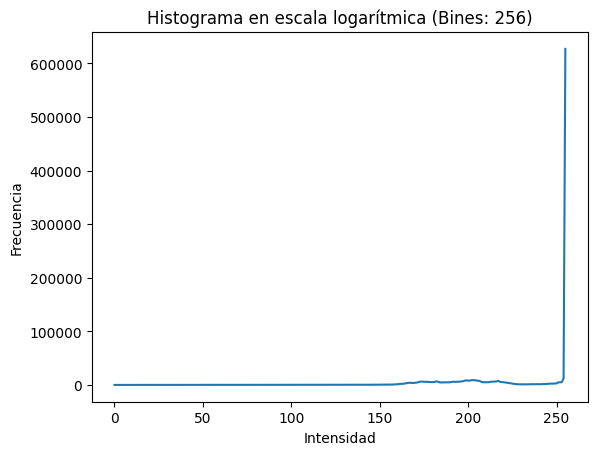

In [17]:
log_scale = False
# Número de bines para el histograma
bins = 256

# Calcular el histograma
hist = cv2.calcHist([gray_img], [0], None, [bins], [0, 256])

# Configurar el gráfico con escala logarítmica en el eje Y
plt.plot(hist)
plt.title(f'Histograma en escala logarítmica (Bines: {bins})')
plt.xlabel('Intensidad')
if log_scale == True:
  plt.yscale('log')  # Escala logarítmica
  plt.ylabel('Frecuencia (log)')
else:
  plt.ylabel('Frecuencia')
plt.show()

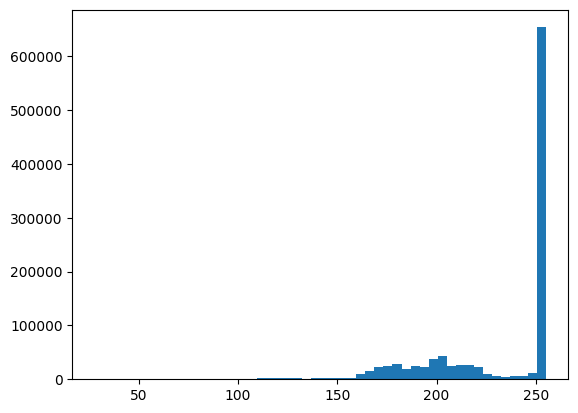

In [20]:
# Aplanamos matriz
vector = gray_img.flatten()
# Histograma
plt.hist(vector, bins=50);

## Negativo

53


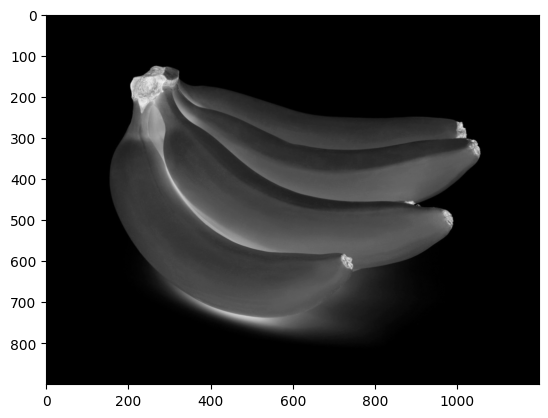

In [21]:
# Generar el negativo de la imagen
imagen_negativa = np.max(gray_img) - gray_img
print(imagen_negativa[600,500]) # Imprimimos un Píxel Gray Scale
plt.imshow(imagen_negativa, cmap='gray');

## Transformaciones Logarítmicas

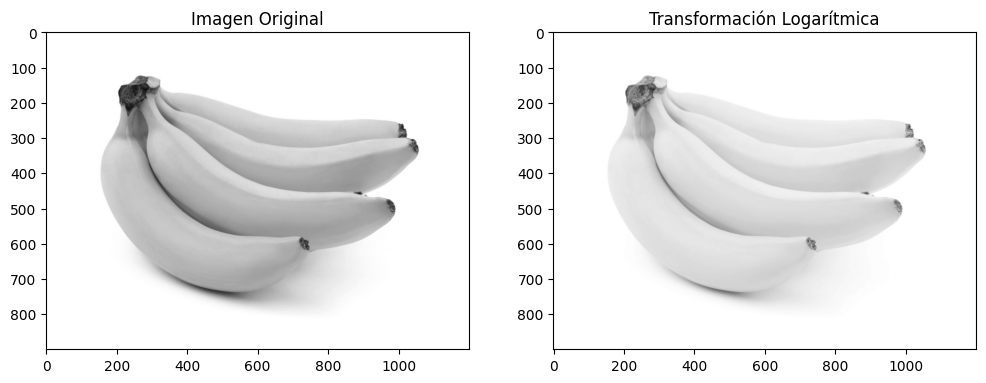

In [22]:
# Transformación logarítmica
img_normalizada = gray_img.astype(np.float32) + 1  # Añadir 1 para evitar log(0)
# Puedes ajustar este valor para escalar la salida
c_log = 255 / np.log10(1 + 255)
imagen_logaritmica = c_log * np.log10(1 + img_normalizada)
# Convertir la imagen de vuelta a formato uint8
imagen_logaritmica = np.uint8(np.clip(imagen_logaritmica, 0, 255))
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(gray_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Transformación Logarítmica")
plt.imshow(imagen_logaritmica, cmap='gray')
plt.show()

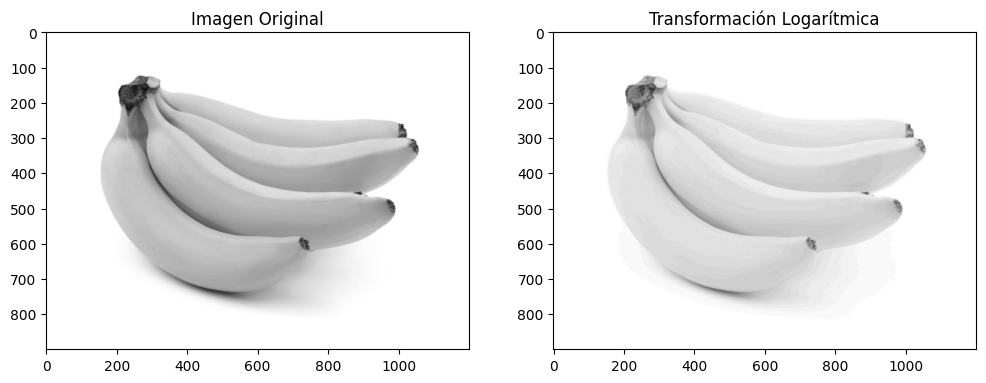

In [23]:
# Cargar imagen en escala de grises
img = gray_img

# Obtener dimensiones de la imagen
rows, columns = img.shape

# Crear una matriz vacía para la nueva imagen transformada
img2 = np.zeros((rows, columns), dtype=np.uint8)

# Parámetros de la transformación exponencial
gamma = 0.08  # Valor de gamma
c = 255 / (255 ** gamma)  # Constante de normalización

# Aplicar la transformación exponencial píxel a píxel
for x in range(rows):
    for y in range(columns):
        img2[x, y] = np.clip(c * (img[x, y] ** gamma), 0, 255)

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(gray_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Transformación Logarítmica")
plt.imshow(img2, cmap='gray')
plt.show()


## Corrección Gamma

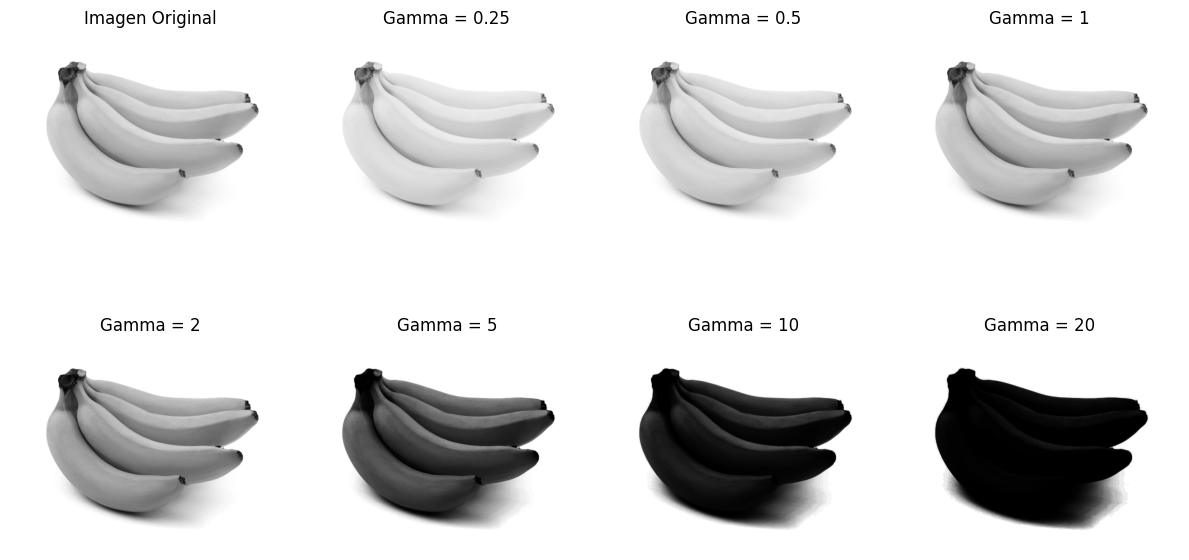

In [ ]:
# Lista de valores gamma
gamma_values = [0.25, 0.5, 1, 2, 5, 10, 20]

# Crear una figura para las imágenes
plt.figure(figsize=(12, 7))

# Agregar la imagen original como la primera
plt.subplot(2, 4, 1)
plt.title("Imagen Original")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

# Normalizar al rango [0, 1]
normalized_img = gray_img / 255.0

# Generar y mostrar las imágenes transformadas
for i, gamma in enumerate(gamma_values, start=2):
    # Normalización y transformación gamma
    c = 255
    img_gamma = c*np.power(normalized_img, gamma) # Aplicar transformación gamma

    # Mostrar la imagen transformada
    plt.subplot(2, 4, i)
    plt.title(f"Gamma = {gamma}")
    plt.imshow(img_gamma, cmap='gray')
    plt.axis('off')

# Ajustar diseño y mostrar la cuadrícula
plt.tight_layout()
plt.show()

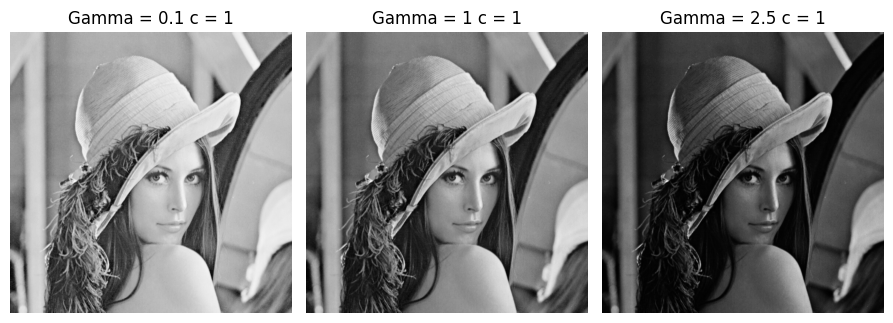

In [ ]:
# descargar la imagen desde la URL
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
response = requests.get(url, headers=headers)

image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)  # Cargar en escala de grises

normalized_img = image.astype(np.float32) / 255.0

# Lista de valores gamma
gamma_values = [0.1, 1, 2.5]
constants = [1,1,1]

# Crear una figura para las imágenes
plt.figure(figsize=(12, 7))

# # Agregar la imagen original como la primera
# plt.subplot(2, 4, 1)
# plt.title("Imagen Original")
# plt.imshow(normalized_img, cmap='gray')
# plt.axis('off')

# Generar y mostrar las imágenes transformadas
for i, gamma in enumerate(gamma_values, start=2):
    # Normalización y transformación gamma
    c = constants[i - 2]
    img_gamma = c * np.power(normalized_img, gamma)  # Aplicar transformación gamma

    # Mostrar la imagen transformada
    plt.subplot(2, 4, i)
    plt.title(f"Gamma = {gamma} c = {c}")
    plt.imshow(img_gamma, cmap='gray')
    plt.axis('off')

# Ajustar diseño y mostrar la cuadrícula
plt.tight_layout()
plt.show()

## Procesado del Histograma

In [24]:
# Abrimos la imagen con openCV: Se trata de una matriz de numpy
# img = cv2.imread('../images/bananos.jpg')

# Opción Colab: Cargar la imagen desde un archivo local en Google Colab
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
type(img)

Saving peppers.png to peppers.png


numpy.ndarray

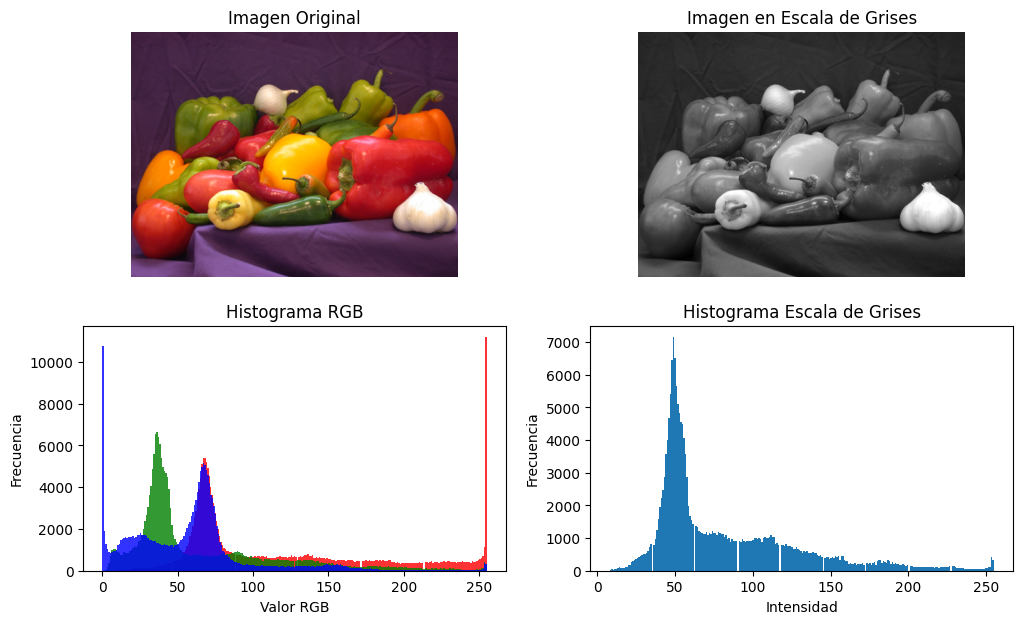

In [ ]:
# Convert the color channels from BGR (OpenCV default) to RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 7))
plt.subplot(2, 2, 1)
plt.title("Imagen Original")
plt.imshow(rgb_img)
plt.axis('off');
# Pasamos a Escala de Grises (Un solo valor por píxel donde 0 es negro y 255 blanco)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(2, 2, 2)
plt.title("Imagen en Escala de Grises")
plt.imshow(gray_img, cmap='gray')
plt.axis('off');
plt.subplot(2, 2, 3)
color = ('r','g','b')
for i, c in enumerate(color):
    canal = rgb_img[:,:,i].flatten()

    plt.hist(canal, bins=256, color=c, alpha=0.8)
    plt.title("Histograma RGB")
    plt.xlabel("Valor RGB")
    plt.ylabel("Frecuencia");
# Aplanamos matriz
vector = gray_img.flatten()
# Histograma
plt.subplot(2, 2, 4)
plt.hist(vector, bins=256)
plt.title("Histograma Escala de Grises")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia");

In [ ]:
print(f'****** Imagen RGB')
print(f'Resolución: {rgb_img.shape[0]}x{rgb_img.shape[1]}')
color = ('Red','Green','Blue')
for i, c in enumerate(color):
    canal = rgb_img[:,:,i].flatten()
    print(f'Canal {c}:')
    print(f'Valor mínimo: {np.min(canal)}')
    print(f'Valor máximo: {np.max(canal)}')
print(f'****** Imagen Escala de Grises')
print(f'Resolución: {gray_img.shape[0]}x{gray_img.shape[1]}')
print(f'Número de píxeles: {len(vector)}')
print(f'Valor mínimo: {np.min(vector)}')
print(f'Valor máximo: {np.max(vector)}')

****** Imagen RGB
Resolución: 384x512
Canal Red:
Valor mínimo: 5
Valor máximo: 255
Canal Green:
Valor mínimo: 1
Valor máximo: 255
Canal Blue:
Valor mínimo: 0
Valor máximo: 255
****** Imagen Escala de Grises
Resolución: 384x512
Número de píxeles: 196608
Valor mínimo: 8
Valor máximo: 255


### Ecualización del Histograma

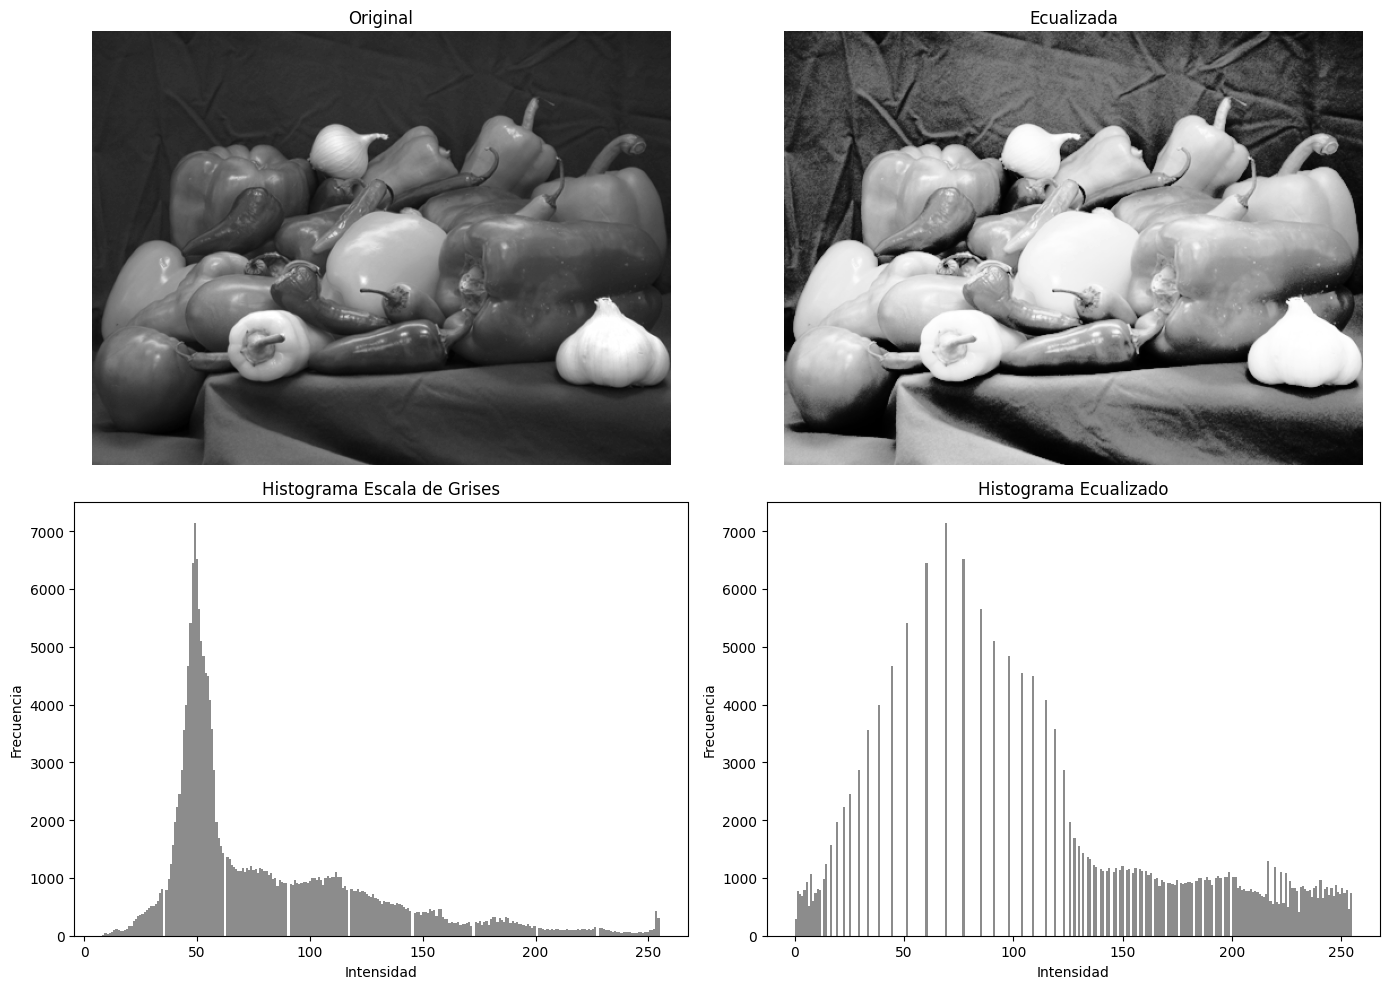

In [ ]:
# Aplicar ecualización del histograma
equalized_image = cv2.equalizeHist(gray_img)

# Configurar la figura y tamaño
plt.figure(figsize=(14, 10))

# Imagen original
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')  # Eliminar ejes

# Imagen ecualizada
plt.subplot(2, 2, 2)
plt.title("Ecualizada")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')  # Eliminar ejes

# Aplanamos matriz original
vector_g = gray_img.flatten()

# Histograma de la imagen original
plt.subplot(2, 2, 3)
plt.hist(vector_g, bins=256, color='gray', alpha=0.9)
plt.title("Histograma Escala de Grises")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Histograma de la imagen ecualizada
vector_e = equalized_image.flatten()
plt.subplot(2, 2, 4)
plt.hist(vector_e, bins=256, color='gray', alpha=0.9)
plt.title("Histograma Ecualizado")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Ajustar los espacios entre subplots
plt.tight_layout()
plt.show()

Saving wiki.jpg to wiki (5).jpg


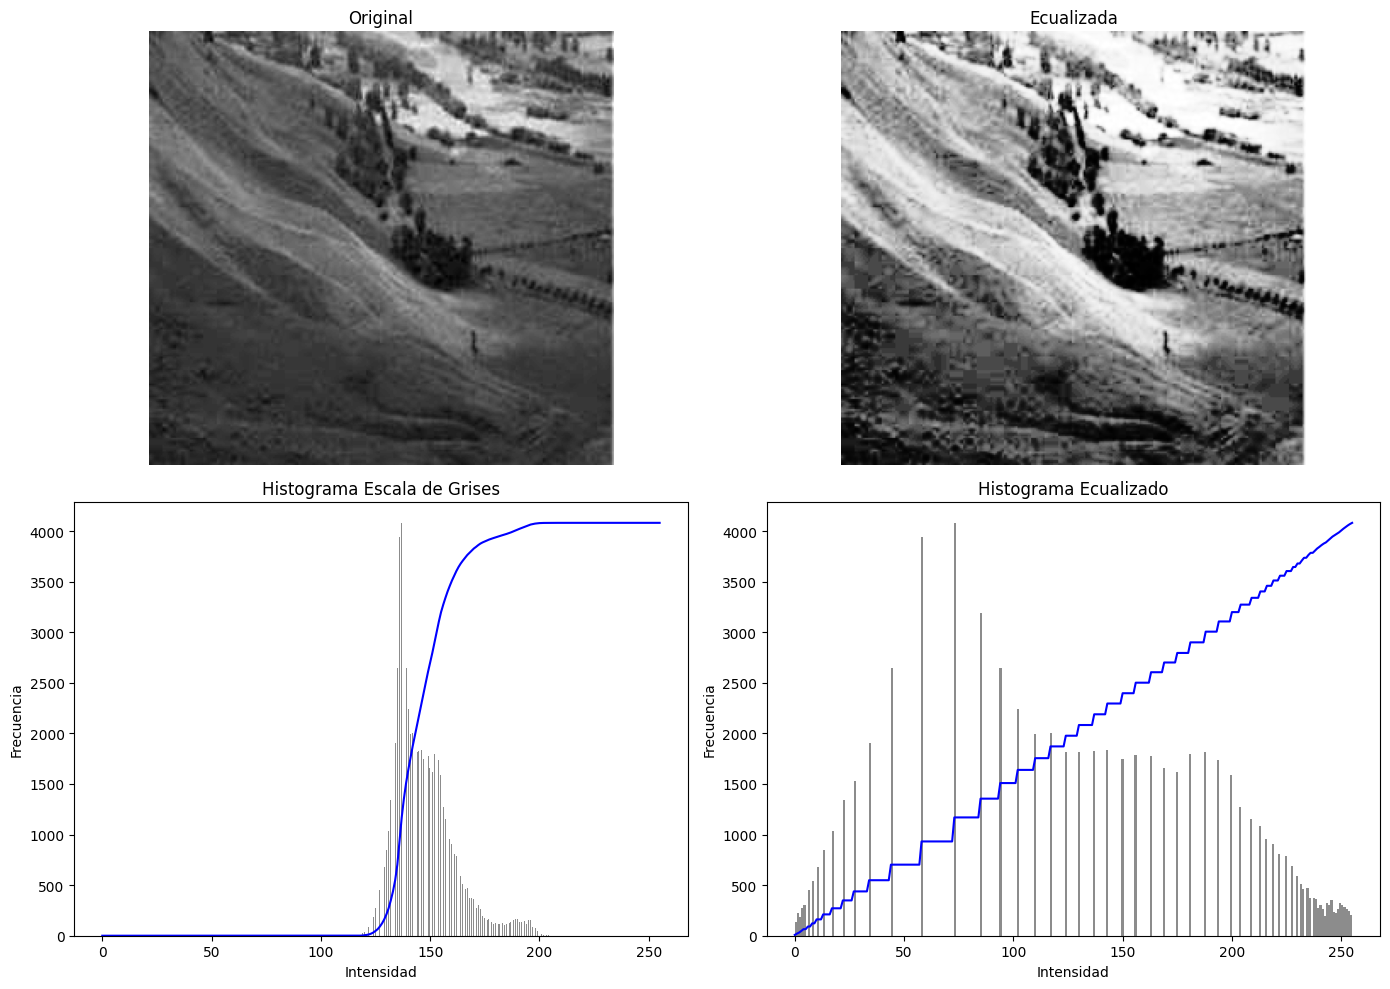

In [ ]:
# Abrimos la imagen con openCV: Se trata de una matriz de numpy
# img = cv2.imread('../images/bananos.jpg')

# Opción Colab: Cargar la imagen desde un archivo local en Google Colab
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
type(img)
#Pasar a imagen de grises
gray_img = gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Aplicar ecualización del histograma
equalized_image = cv2.equalizeHist(gray_img)

hist_o,bins_o = np.histogram(gray_img.flatten(),256,[0,256])

cdf_o = hist_o.cumsum()
cdf_normalized_o = cdf_o * float(hist_o.max()) / cdf_o.max()

hist_e,bins_e = np.histogram(equalized_image.flatten(),256,[0,256])

cdf_e = hist_e.cumsum()
cdf_normalized_e = cdf_e * float(hist_e.max()) / cdf_e.max()

# Configurar la figura y tamaño
plt.figure(figsize=(14, 10))

# Imagen original
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')  # Eliminar ejes

# Imagen ecualizada
plt.subplot(2, 2, 2)
plt.title("Ecualizada")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')  # Eliminar ejes

# Aplanamos matriz original
vector_g = gray_img.flatten()

# Histograma de la imagen original
plt.subplot(2, 2, 3)
plt.plot(cdf_normalized_o, color = 'b')
plt.hist(vector_g, bins=256, color='gray', alpha=0.9)
plt.title("Histograma Escala de Grises")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Histograma de la imagen ecualizada
vector_e = equalized_image.flatten()
plt.subplot(2, 2, 4)
plt.plot(cdf_normalized_e, color = 'b')
plt.hist(vector_e, bins=256, color='gray', alpha=0.9)
plt.title("Histograma Ecualizado")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Ajustar los espacios entre subplots
plt.tight_layout()
plt.show()

### CLAHE (Contrast Limited Adaptive Histogram Equalization)
[CLAHE OpenCV](https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html)

- Divide la imagen en pequeñas regiones llamadas "tiles" y aplica equalización del histograma de forma local.

- Mejora el contraste localmente sin sobrecargarlo globalmente.

- Puede crear efectos de bloques o mosaicos si las transiciones entre tiles no están bien suavizadas.

*Estos métodos pueden combinarse dependiendo de la naturaleza de la imagen. Por ejemplo, combinar CLAHE con corrección gamma suele dar buenos resultados para imágenes nocturnas.*

Saving image_hist.png to image_hist.png


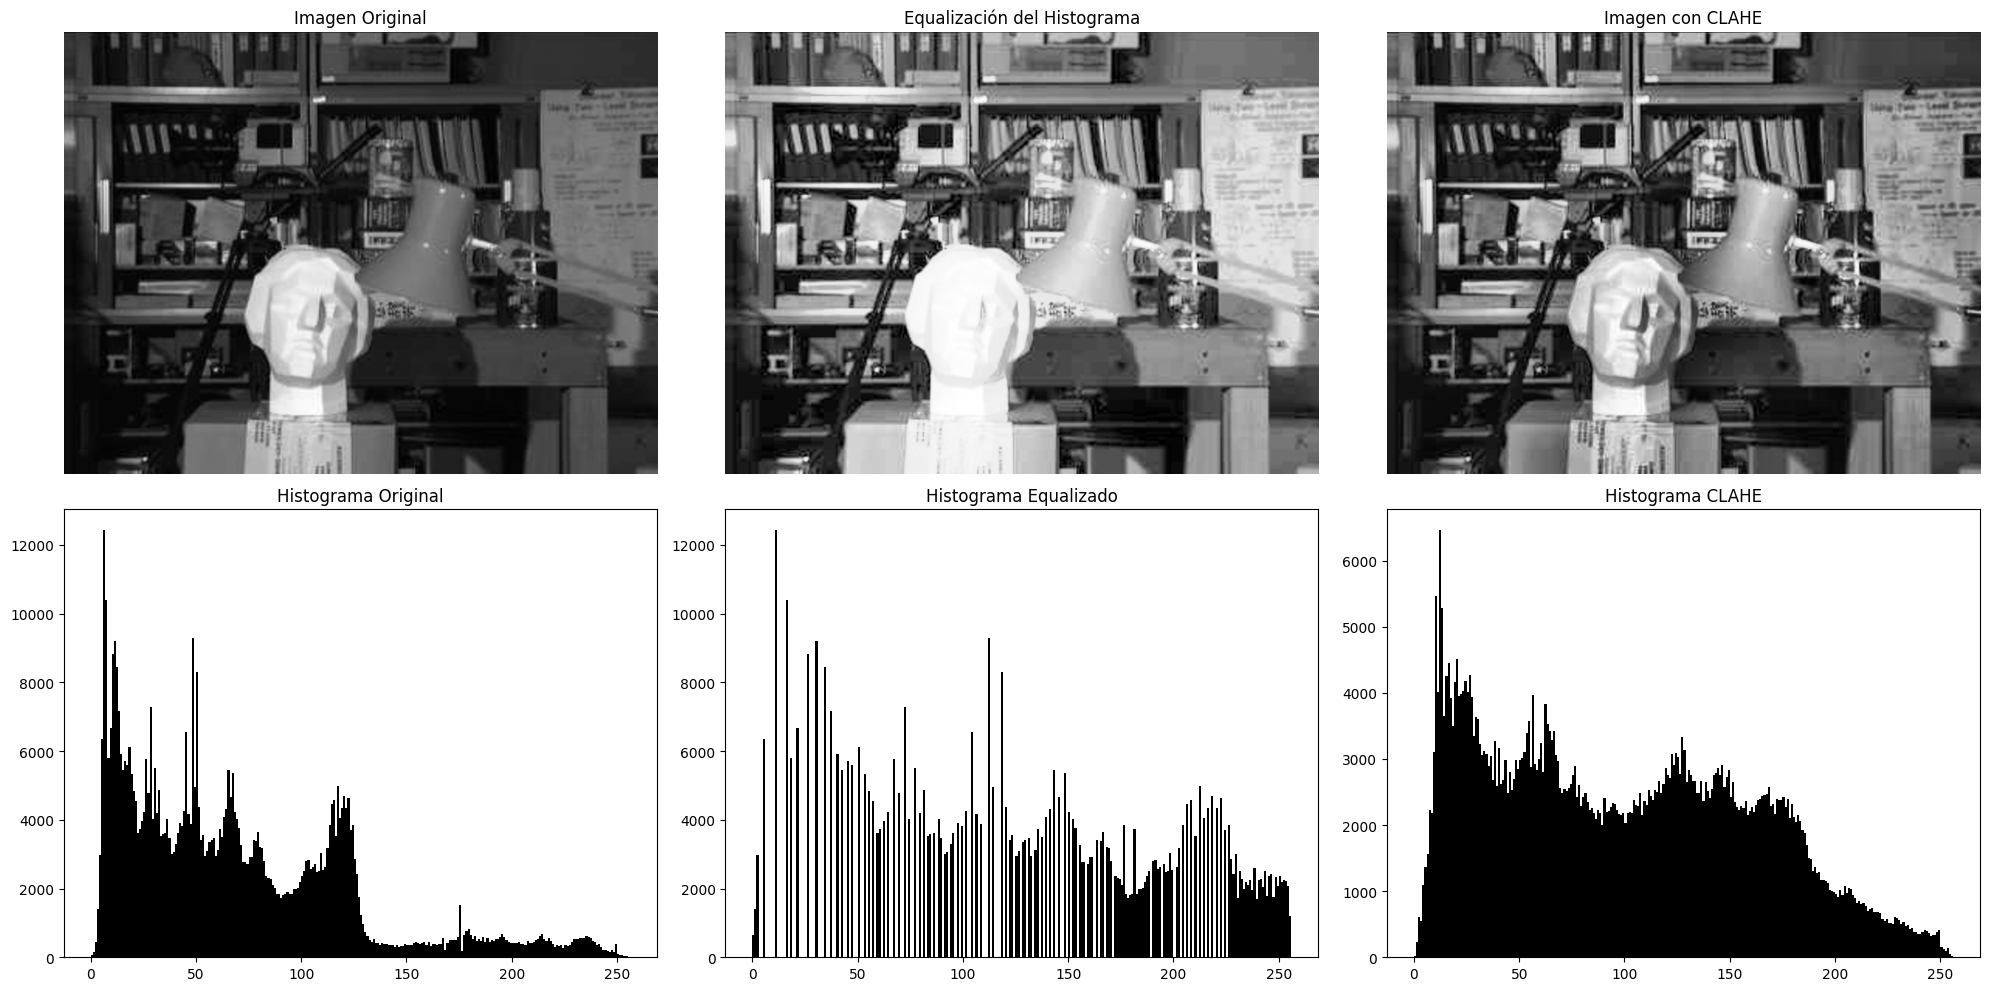

In [25]:
# Subir imagen desde local
uploaded = files.upload()

# Cargar la imagen subida
for filename in uploaded.keys():
    img_path = filename

# Leer la imagen en escala de grises
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 1. Equalización del histograma
img_eq = cv2.equalizeHist(img)

# 2. Crear un objeto CLAHE y aplicar
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img)

# Mostrar imágenes y sus histogramas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Imagen original
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("Imagen Original")
axes[0, 0].axis('off')
axes[1, 0].hist(img.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 0].set_title("Histograma Original")

# Imagen con equalización del histograma
axes[0, 1].imshow(img_eq, cmap='gray')
axes[0, 1].set_title("Equalización del Histograma")
axes[0, 1].axis('off')
axes[1, 1].hist(img_eq.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 1].set_title("Histograma Equalizado")

# Imagen con CLAHE
axes[0, 2].imshow(img_clahe, cmap='gray')
axes[0, 2].set_title("Imagen con CLAHE")
axes[0, 2].axis('off')
axes[1, 2].hist(img_clahe.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 2].set_title("Histograma CLAHE")

plt.tight_layout()
plt.show()


(-0.5, 861.5, 641.5, -0.5)

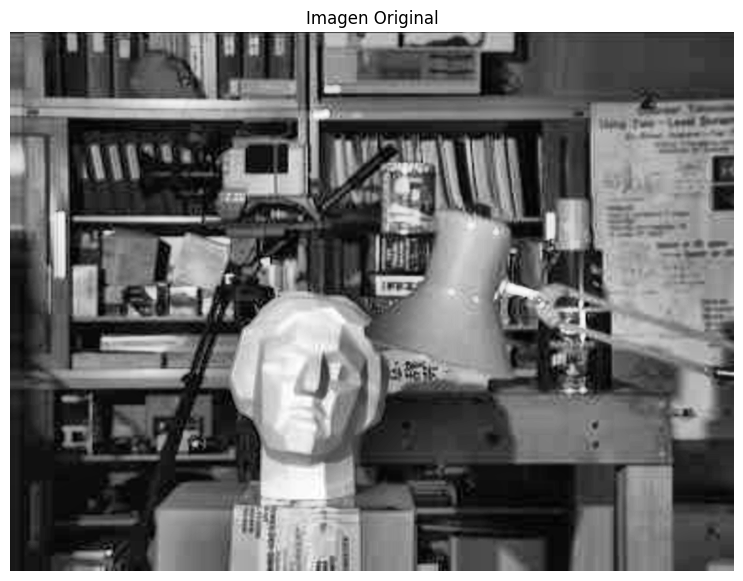

In [ ]:
plt.figure(figsize=(12, 7))

# Agregar la imagen original como la primera
plt.title("Imagen Original")
plt.imshow(img_clahe, cmap='gray')
plt.axis('off')

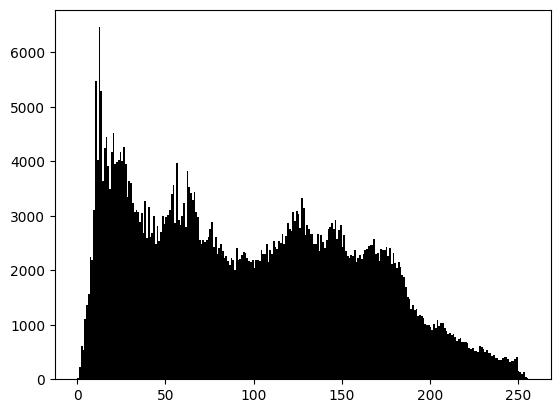

In [ ]:
plt.hist(img_clahe.ravel(), bins=256, range=(0, 256), color='black');

## Operaciones Aritméticas

### Resta

Sube la primera imagen:


Saving transf.jpg to transf (7).jpg
Tamaño Imagen 1: (1080, 1620, 3)
Sube la segunda imagen:


Saving original.jpg to original (7).jpg
Tamaño Imagen 2: (1080, 1620, 3)
Tamaño Imagen 2 (Redimensionada): (1080, 1620, 3)


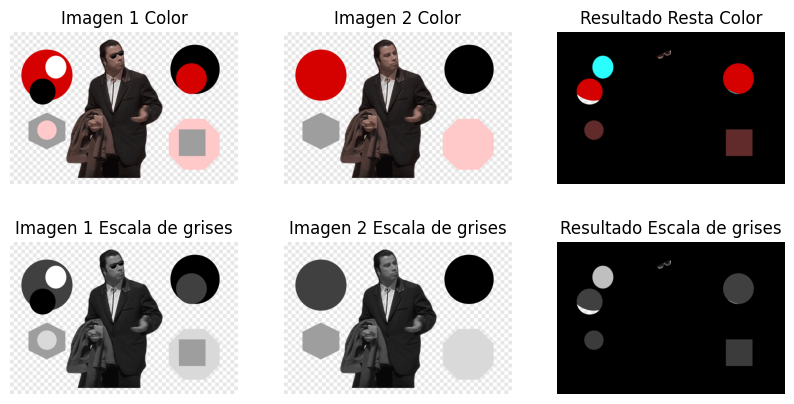

Pixel Imagen 1 (Color): [255 255 255]
Pixel Imagen 2 (Color): [255 255 255]
Pixel Resultado (Color): [0 0 0]
Pixel Imagen 1 (Gris): 255
Pixel Imagen 2 (Gris): 255
Pixel Resultado (Gris): 0


In [ ]:
# Función para cargar una imagen desde archivos locales
def cargar_imagen():
    # Opción Colab: Cargar la imagen desde un archivo local en Google Colab
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    image = cv2.imread(image_path)
    return image

# Subir imágenes
print("Sube la primera imagen:")
image1 = cargar_imagen()
print(f"Tamaño Imagen 1: {image1.shape}")

print("Sube la segunda imagen:")
image2 = cargar_imagen()
print(f"Tamaño Imagen 2: {image2.shape}")

# Redimensionar la segunda imagen para que coincida con la primera
image2_resized = image2
# image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
print(f"Tamaño Imagen 2 (Redimensionada): {image2_resized.shape}")

# Realizar la operación de resta en color
result_color = cv2.subtract(image1, image2_resized)
result_color = cv2.absdiff(image1, image2_resized)

# Convertir a escala de grises
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_resized_gray = cv2.cvtColor(image2_resized, cv2.COLOR_BGR2GRAY)

# Realizar la operación de resta en escala de grises
# result_gray = cv2.subtract(image1_gray, image2_resized_gray)
result_gray = cv2.absdiff(image1_gray, image2_resized_gray)


# Visualizar las imágenes
plt.figure(figsize=(10, 5))

# Imágenes en color
plt.subplot(2, 3, 1)
plt.title("Imagen 1 Color")
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Imagen 2 Color")
plt.imshow(cv2.cvtColor(image2_resized, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Resultado Resta Color")
plt.imshow(cv2.cvtColor(result_color, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Imágenes en escala de grises
plt.subplot(2, 3, 4)
plt.title("Imagen 1 Escala de grises")
plt.imshow(image1_gray, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Imagen 2 Escala de grises")
plt.imshow(image2_resized_gray, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Resultado Escala de grises")
plt.imshow(result_gray, cmap="gray")
plt.axis("off")

plt.show()

# Mostrar valores de píxeles
fila, columna = 84, 150
print(f'Pixel Imagen 1 (Color): {image1[fila, columna]}')
print(f'Pixel Imagen 2 (Color): {image2_resized[fila, columna]}')
print(f'Pixel Resultado (Color): {result_color[fila, columna]}')
print(f'Pixel Imagen 1 (Gris): {image1_gray[fila, columna]}')
print(f'Pixel Imagen 2 (Gris): {image2_resized_gray[fila, columna]}')
print(f'Pixel Resultado (Gris): {result_gray[fila, columna]}')


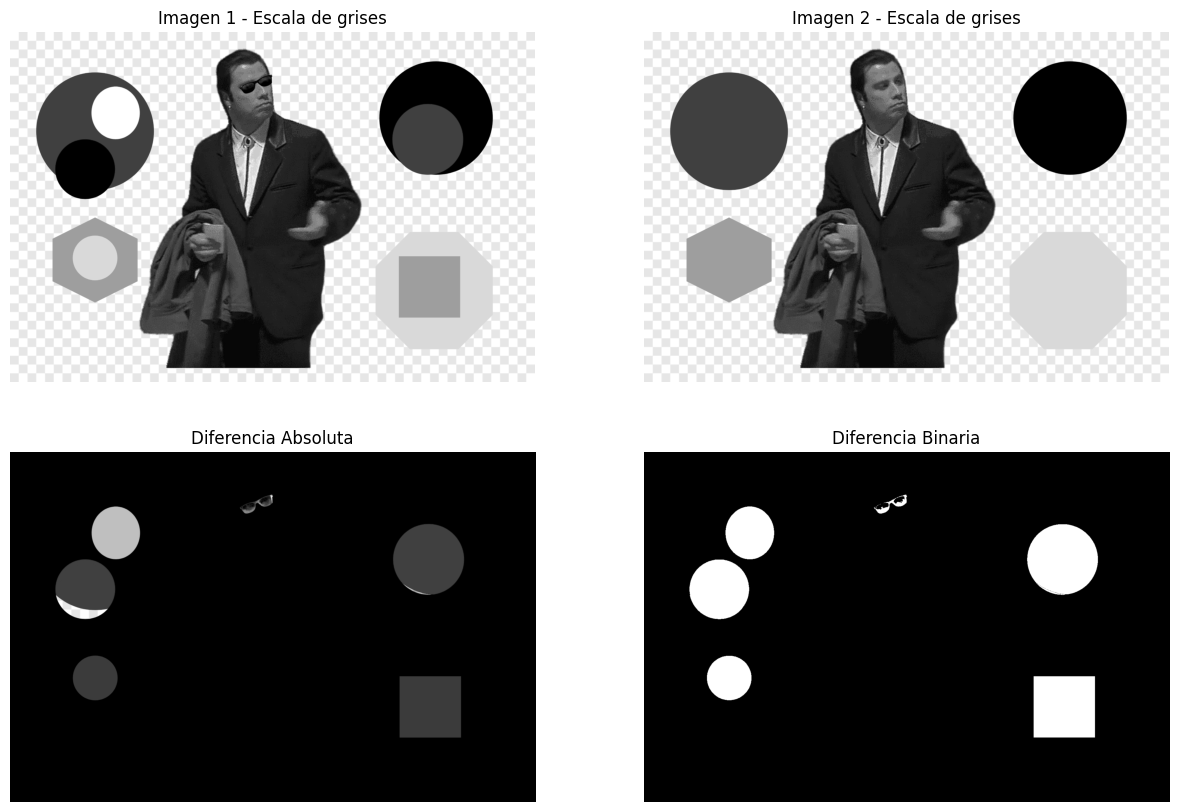

In [ ]:
# Realizar la resta absoluta
difference = cv2.absdiff(image1_gray, image2_resized_gray)

# Aplicar un umbral para resaltar cambios 50 es el umbral
_, binary_diff = cv2.threshold(difference, 50, 255, cv2.THRESH_BINARY)

# Visualizar las imágenes
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Imagen 1 - Escala de grises")
plt.imshow(image1_gray, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Imagen 2 - Escala de grises")
plt.imshow(image2_resized_gray, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Diferencia Absoluta")
plt.imshow(difference, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Diferencia Binaria")
plt.imshow(binary_diff, cmap="gray")
plt.axis("off")

plt.show()

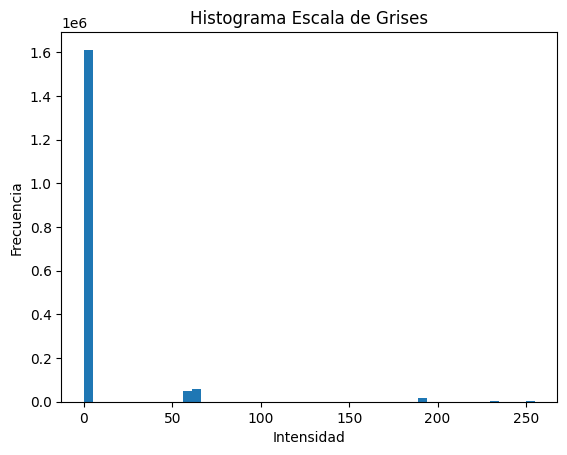

In [ ]:
# Aplanamos matriz
vector = difference.flatten()
# Histograma
plt.hist(vector, bins=50)
plt.title("Histograma Escala de Grises")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia");

In [ ]:
# Función para cargar una imagen
def cargar_imagen():
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir a RGB para visualización
    return image

# Cargar la imagen
print("Sube una imagen:")
imagen = cargar_imagen()

# Función para añadir ruido gaussiano
def añadir_ruido_gaussiano(imagen, mean=0, sigma=50):
    ruido = np.random.normal(mean, sigma, imagen.shape).astype(np.float32)
    imagen_ruido = imagen.astype(np.float32) + ruido
    imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)
    return imagen_ruido

# Generar múltiples imágenes con ruido y promediarlas
num_iteraciones = 10
imagenes_con_ruido = []
imagen_promediada = np.zeros_like(imagen, dtype=np.float32)

for _ in range(num_iteraciones):
    imagen_con_ruido = añadir_ruido_gaussiano(imagen)
    imagenes_con_ruido.append(imagen_con_ruido)
    imagen_promediada += imagen_con_ruido.astype(np.float32)

# Promediar las imágenes
imagen_promediada /= num_iteraciones
imagen_promediada = imagen_promediada.astype(np.uint8)

# Visualizar resultados
plt.figure(figsize=(30, 15))

# Mostrar una imagen con ruido
plt.subplot(1, 3, 2)
plt.title("Imagen con Ruido Gaussiano")
plt.imshow(imagenes_con_ruido[0])
plt.axis("off")

# Mostrar la imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(imagen)
plt.axis("off")

# Mostrar la imagen promediada
plt.subplot(1, 3, 3)
plt.title("Imagen Promediada")
plt.imshow(imagen_promediada)
plt.axis("off")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Generar múltiples imágenes con ruido y promediarlas
num_iteraciones = 50
imagenes_con_ruido = []
imagen_promediada = np.zeros_like(imagen, dtype=np.float32)

for _ in range(num_iteraciones):
    imagen_con_ruido = añadir_ruido_gaussiano(imagen)
    imagenes_con_ruido.append(imagen_con_ruido)
    imagen_promediada += imagen_con_ruido.astype(np.float32)

# Promediar las imágenes
imagen_promediada /= num_iteraciones
imagen_promediada = imagen_promediada.astype(np.uint8)

# Visualizar resultados
plt.figure(figsize=(30, 15))

# Mostrar una imagen con ruido
plt.subplot(1, 3, 2)
plt.title("Imagen con Ruido Gaussiano")
plt.imshow(imagenes_con_ruido[0])
plt.axis("off")

# Mostrar la imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(imagen)
plt.axis("off")

# Mostrar la imagen promediada
plt.subplot(1, 3, 3)
plt.title("Imagen Promediada")
plt.imshow(imagen_promediada)
plt.axis("off")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Multiplicación
- Podemos modificar el brillo aplicando un factor de escala a toda la imagen
- Recuerda que al aplicar un factor de escala hay pixeles que pueden superar el umbral!
- Ej: un pixel con intensidad 254 con una escala de 2 pasará a valer 508. Se puede optar por recorte de valores entre 0 y 255 (8bits) o normalizar

Sube tu imagen:


Saving Sample-face-detection-results-of-pretrained-baseline-on-the-original-images-of-the.png to Sample-face-detection-results-of-pretrained-baseline-on-the-original-images-of-the (10).png


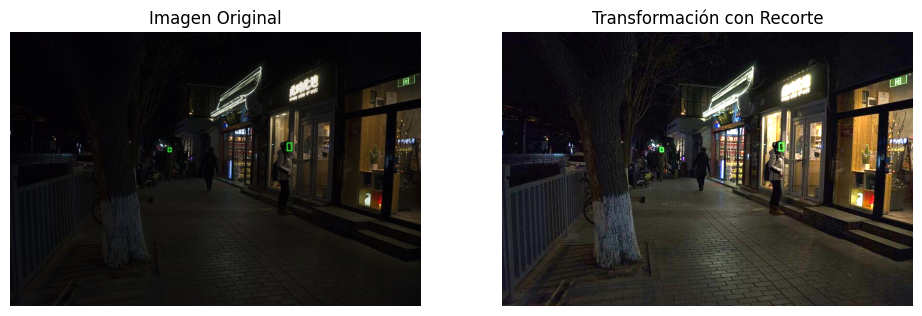

In [ ]:
# Subir una imagen desde local
uploaded = files.upload()

# Cargar la imagen usando cv2
for filename in uploaded.keys():
    image = cv2.imread(filename, cv2.IMREAD_UNCHANGED)  # Cargar sin alterar el formato original

# Verificar si la imagen es en escala de grises o color
if len(image.shape) == 2:  # Solo tiene ancho y alto, es escala de grises
    is_grayscale = True
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convertir a RGB para visualización
else:
    is_grayscale = False
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para visualización

# Definir el factor de escala
factor = 2.5  # Cambia este valor para aumentar o disminuir el brillo (Ejemplo: 0.8 para reducir)

# 1. Transformación con recorte (np.clip)
if is_grayscale:
    image_clipped = np.clip(image * factor, 0, 255).astype(np.uint8)
    clipped_rgb = cv2.cvtColor(image_clipped, cv2.COLOR_GRAY2RGB)  # Para visualizar
else:
    image_clipped = np.clip(image * factor, 0, 255).astype(np.uint8)
    clipped_rgb = cv2.cvtColor(image_clipped, cv2.COLOR_BGR2RGB)

# 2. Transformación con normalización
# if is_grayscale:
#     normalized = ((image * factor - np.min(image * factor)) / (np.max(image * factor) - np.min(image * factor)) * 255).astype(np.uint8)
#     normalized_rgb = cv2.cvtColor(normalized, cv2.COLOR_GRAY2RGB)  # Para visualizar
# else:
#     normalized = ((image * factor - np.min(image * factor)) / (np.max(image * factor) - np.min(image * factor)) * 255).astype(np.uint8)
#     normalized_rgb = cv2.cvtColor(normalized, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes lado a lado
plt.figure(figsize=(18, 6))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(image_rgb)
plt.axis("off")

# Imagen con recorte
plt.subplot(1, 3, 2)
plt.title("Transformación con Recorte")
plt.imshow(clipped_rgb)
plt.axis("off");

# Imagen con normalización
# plt.subplot(1, 3, 3)
# plt.title("Transformación con Normalización")
# plt.imshow(normalized_rgb)
# plt.axis("off")

# plt.tight_layout()
# plt.show()

#pintar mismo pixel en las 3 imagenes
# fila, columna = 400, 700
# print(f'Pixel Imagen Original: {image[fila, columna]}')
# print(f'Pixel Imagen con Recorte: {image_clipped[fila, columna]}')
# print(f'Pixel Imagen con Normalización: {normalized[fila, columna]}')

**Modelo de color YUV**

Y → Luminancia (brillo, escala de grises).

U → Componente de crominancia azul.

V → Componente de crominancia roja.

Saving Captura de pantalla 2024-12-02 232328.png to Captura de pantalla 2024-12-02 232328 (3).png


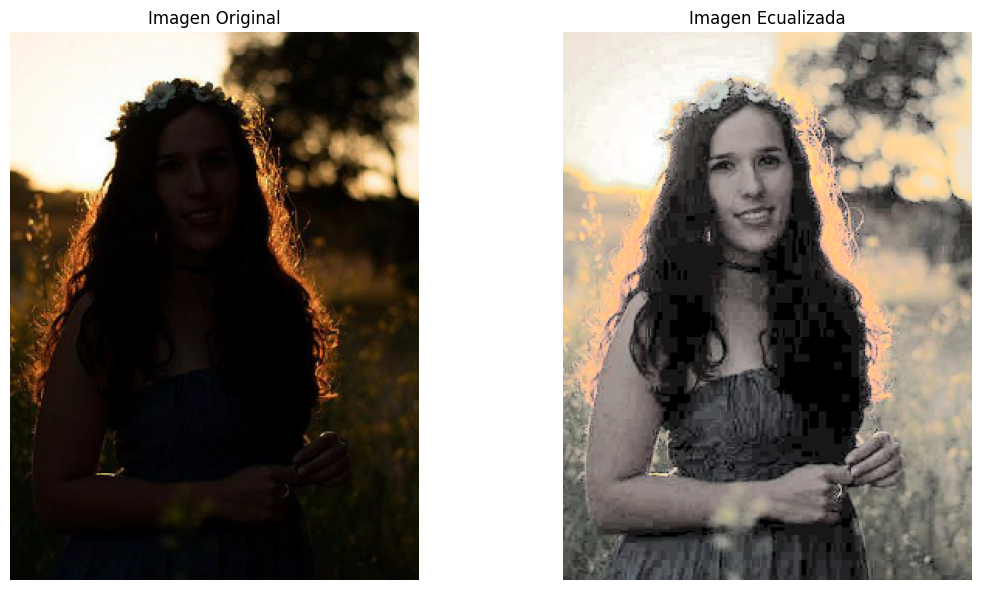

In [ ]:
import cv2
# Función para cargar una imagen
def cargar_imagen():
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    image = cv2.imread(image_path)
    return image

# Cargar imagen
image = cargar_imagen()

# Convertir al espacio YUV
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Ecualizar el canal de luminosidad (Y)
yuv_image[:, :, 0] = cv2.equalizeHist(yuv_image[:, :, 0])

# Convertir de vuelta al espacio BGR
result = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)

# Convertir el resultado al formato RGB para matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original y la ecualizada
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

# Imagen ecualizada
plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title("Imagen Ecualizada")
plt.axis("off")

plt.tight_layout()
plt.show()

Saving Sample-face-detection-results-of-pretrained-baseline-on-the-original-images-of-the.png to Sample-face-detection-results-of-pretrained-baseline-on-the-original-images-of-the.png


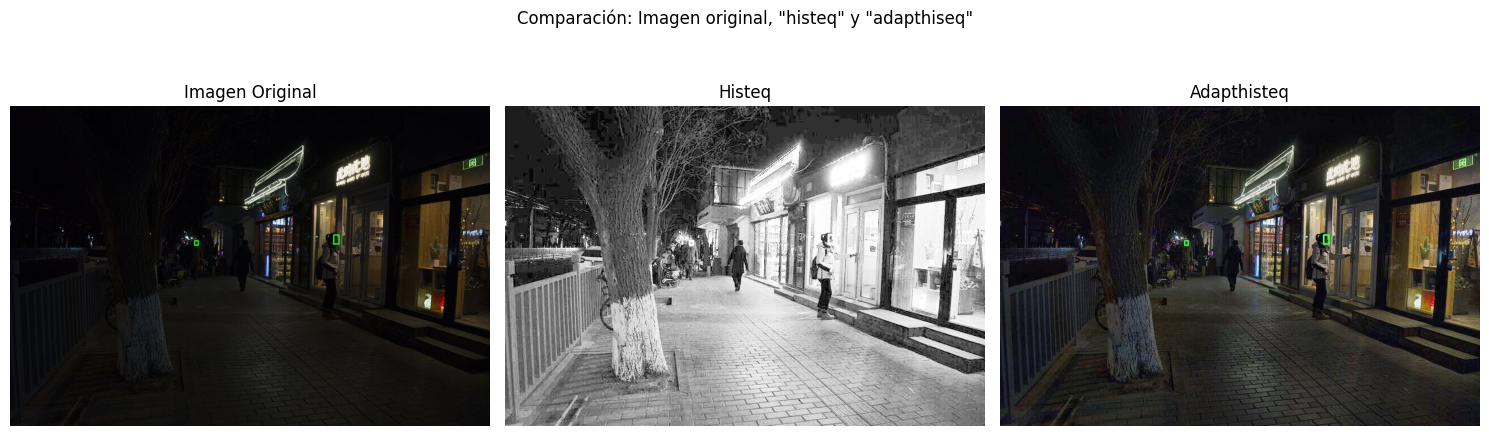

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure

# Cargar la imagen original
imagen_original = cargar_imagen()
imagen_original = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)  # Convertir a RGB si es necesario

# Ecualización del histograma
imagen_procesada7 = cv2.equalizeHist(cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY))

# Adaptative Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
R = clahe.apply(imagen_original[:, :, 0])
G = clahe.apply(imagen_original[:, :, 1])
B = clahe.apply(imagen_original[:, :, 2])
imagen_procesada8 = cv2.merge((R, G, B))

# Visualización usando matplotlib
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(imagen_original)
ax[0].set_title('Imagen Original')
ax[0].axis('off')

ax[1].imshow(imagen_procesada7, cmap='gray')
ax[1].set_title('Histeq')
ax[1].axis('off')

ax[2].imshow(imagen_procesada8)
ax[2].set_title('Adapthisteq')
ax[2].axis('off')

plt.suptitle('Comparación: Imagen original, "histeq" y "adapthiseq"')
plt.tight_layout()
plt.show()

Saving Sample-face-detection-results-of-pretrained-baseline-on-the-original-images-of-the.png to Sample-face-detection-results-of-pretrained-baseline-on-the-original-images-of-the (1).png


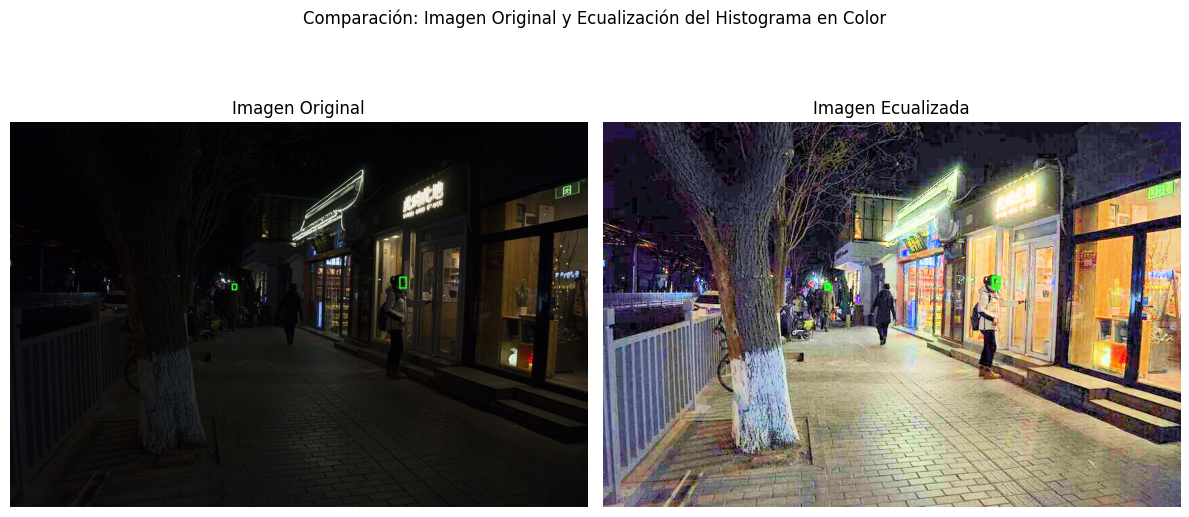

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen en color
imagen_original = cargar_imagen()
imagen_original = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para visualización

# Convertir la imagen al espacio de color HSV
imagen_hsv = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2HSV)

# Ecualizar el histograma en el canal V (Value)
imagen_hsv[:, :, 2] = cv2.equalizeHist(imagen_hsv[:, :, 2])

# Convertir de nuevo al espacio RGB
imagen_ecualizada = cv2.cvtColor(imagen_hsv, cv2.COLOR_HSV2RGB)

# Visualización de las imágenes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(imagen_original)
ax[0].set_title('Imagen Original')
ax[0].axis('off')

ax[1].imshow(imagen_ecualizada)
ax[1].set_title('Imagen Ecualizada')
ax[1].axis('off')

plt.suptitle('Comparación: Imagen Original y Ecualización del Histograma en Color')
plt.tight_layout()
plt.show()

Saving Sample-face-detection-results-of-pretrained-baseline-on-the-original-images-of-the.png to Sample-face-detection-results-of-pretrained-baseline-on-the-original-images-of-the (5).png


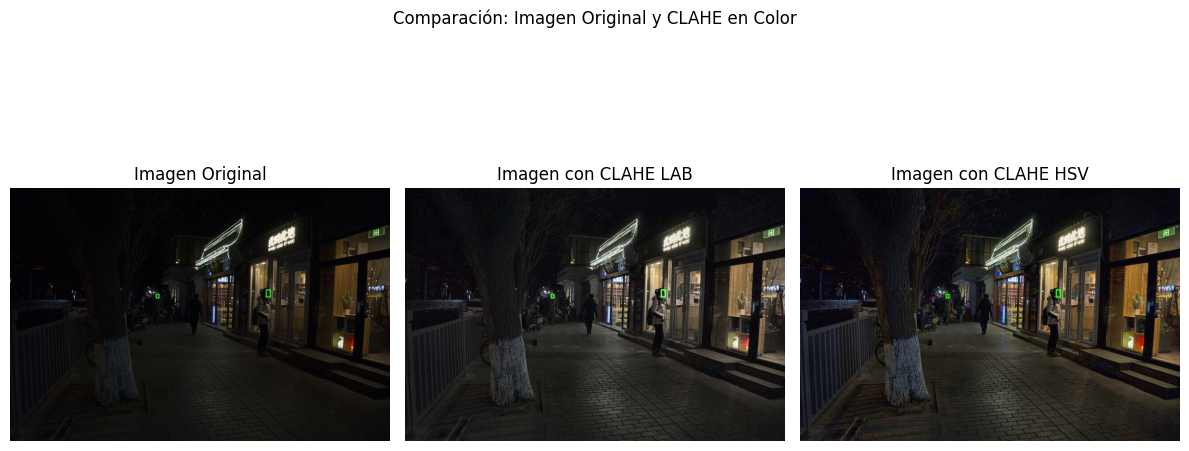

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen en color
imagen_original = cargar_imagen()
imagen_original = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para visualización

# Convertir la imagen al espacio de color LAB
imagen_lab = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2LAB)
# HSV
imagen_hsv = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2HSV)

# Ecualizar el histograma en el canal L (Luminosidad)

# Dividir los canales L, A, B
L, A, B = cv2.split(imagen_lab)
#HSV
H, S, V = cv2.split(imagen_hsv)

# Ecualizar el histograma en el canal L (Luminosidad)

# Crear el objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Aplicar CLAHE en el canal L (luminosidad)
L_clahe = clahe.apply(L)
# V channel
V_clahe = clahe.apply(V)

# Combinar los canales de vuelta
imagen_lab_clahe = cv2.merge((L_clahe, A, B))
# HSV
imagen_hsv_clahe = cv2.merge((H, S, V_clahe))

# Convertir la imagen de vuelta al espacio RGB
imagen_clahe_lab = cv2.cvtColor(imagen_lab_clahe, cv2.COLOR_LAB2RGB)
imagen_clahe_hsv = cv2.cvtColor(imagen_hsv_clahe, cv2.COLOR_HSV2RGB)

# Visualización de las imágenes
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(imagen_original)
ax[0].set_title('Imagen Original')
ax[0].axis('off')

ax[1].imshow(imagen_clahe_lab)
ax[1].set_title('Imagen con CLAHE LAB')
ax[1].axis('off')

ax[2].imshow(imagen_clahe_hsv)
ax[2].set_title('Imagen con CLAHE HSV')
ax[2].axis('off')

plt.suptitle('Comparación: Imagen Original y CLAHE en Color')
plt.tight_layout()
plt.show()


In [ ]:
# Cargar la imagen en color
imagen_original = cargar_imagen()
imagen_original = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)

Saving peppers.png to peppers (1).png


(-0.5, 511.5, 383.5, -0.5)

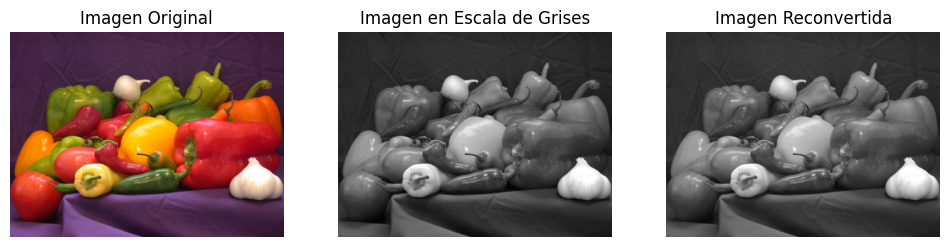

In [ ]:
# Visualización de las imágenes
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(imagen_original)
ax[0].set_title('Imagen Original')
ax[0].axis('off')
imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)
ax[1].imshow(imagen_gris, cmap='gray')
ax[1].set_title('Imagen en Escala de Grises')
ax[1].axis('off')
imagen_reconvertida = cv2.cvtColor(imagen_gris, cv2.COLOR_GRAY2RGB)
ax[2].imshow(imagen_reconvertida)
ax[2].set_title('Imagen Reconvertida')
ax[2].axis('off')
